# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

In [3]:
# Read your api key environment variable
load_dotenv(dotenv_path="API_Key.env")
api_key = os.getenv("News_API_Key")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q="bitcoin", language="en")

In [6]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q="ethereum", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
    
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [8]:
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
2,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
    
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [10]:
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ..."


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.064979,0.034053,0.913684,0.052211
std,0.374842,0.067692,0.096465,0.058968
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.835000,0.000000
50%,0.000000,0.000000,0.947000,0.050000
75%,0.238150,0.031000,1.000000,0.066500
max,0.765000,0.215000,1.000000,0.174000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.154960,0.021050,0.910050,0.068900
std,0.373483,0.054473,0.116833,0.095416
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.866000,0.000000
50%,0.000000,0.000000,0.973500,0.026500
75%,0.430825,0.000000,1.000000,0.096750
max,0.946800,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.068900.

Q: Which coin had the highest compound score?

A: Ethereum has the highest max compound score of 0.946800.

Q. Which coin had the highest positive score?

A: Ethereum has the highest max positive score of 0.318000.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shanaamiti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [16]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
2,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi...","[two, day, ago, billion, worth, bitcoin, sat, ..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."


In [17]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[paypal, ha, launched, generosity, network, pl..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [55]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('virtual', 'currency'), 6),
 (('currency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('photo', 'representations'), 3),
 (('representations', 'virtual'), 3),
 (('char', 'reuters'), 3),
 (('reuters', 'stafffile'), 3),
 (('stafffile', 'photo'), 3),
 (('photo', 'representation'), 3),
 (('reutersdado', 'ruvicillustrationlondon'), 3)]

In [56]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('virtual', 'currency'), 9),
 (('photo', 'representation'), 6),
 (('char', 'reuters'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('representation', 'virtual'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', 'reutersdado'), 5)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 19),
 ('bitcoin', 11),
 ('currency', 8),
 ('reuters', 8),
 ('photo', 6),
 ('virtual', 6),
 ('us', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5)]

In [23]:
# Get the top 10 words for Ethereum
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 13),
 ('photo', 10),
 ('currency', 10),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

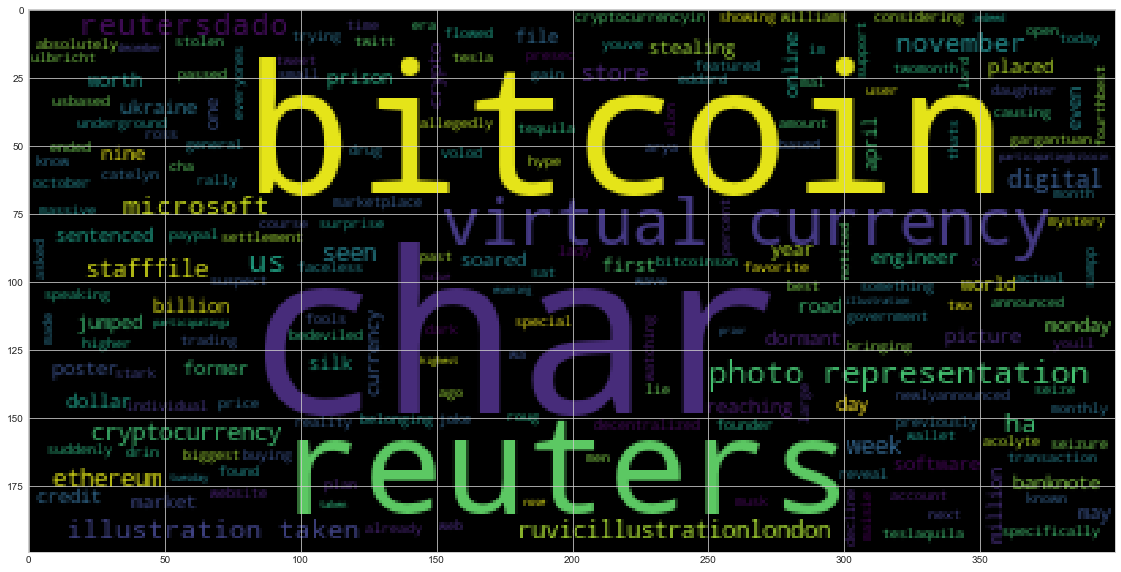

In [25]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

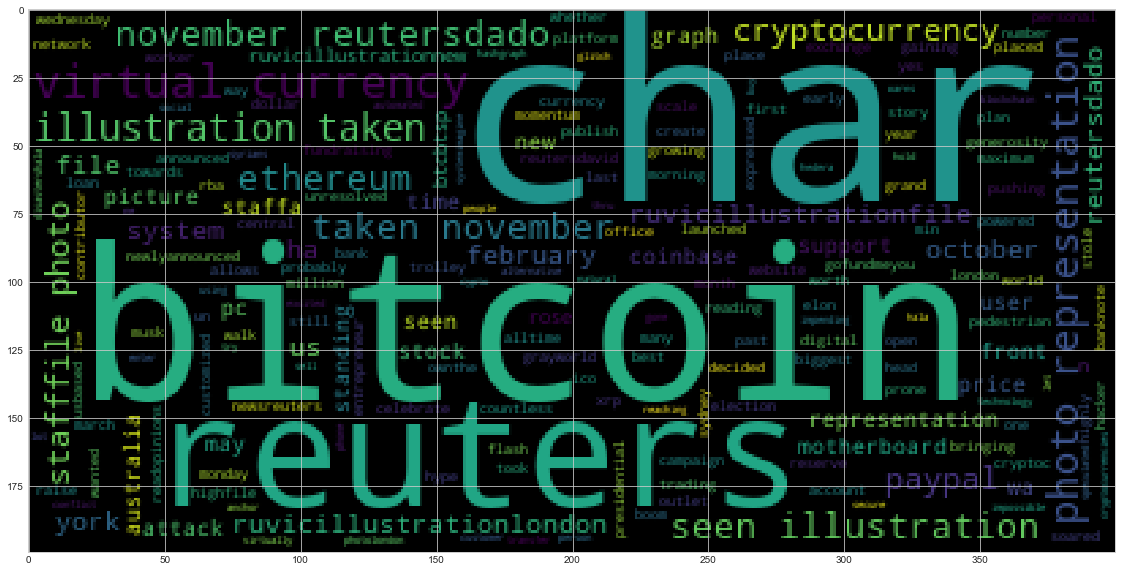

In [29]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_text

'A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft\'s online store. From 2016 to 2018, Volod… [+3307 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentr

In [46]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [48]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [49]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
Two days ago DATE
about $1 billion MONEY
bitcoin GPE
the Silk Road FAC
2013 DATE
one CARDINAL
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
2018 DATE
2020 DATE
Tesla Tequila ORG
April DATE
Elon Musk ORG
Teslaquila WORK_OF_ART
U.S. GPE
Individual X WORK_OF_ART
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
8 CARDINAL
7 CARDINAL
Bitco

---

## Ethereum NER

In [50]:
# Concatenate all of the ethereum text together
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_text

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, ju

In [51]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [52]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [53]:
# List all Entities
for ent in ethereum_doc.ents:
    print (ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
PayPal PRODUCT
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
the Reserve Bank of Australia ORG
Sydney GPE
Australia GPE
March 7, 2017 DATE
David Gray PERSON
World News ORG
Reuters ORG
The New York Times ORG
Coinbase ORG
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk WORK_OF_ART
early February this year DATE
last month DATE
October DATE
$24 million MONEY
November DATE
8 DATE
2020 DATE
5 CARDINAL
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DAT